In [44]:
%pip install torchvision
%pip install torchinfo
%pip install humanize
%pip install psutil

# 라이브러리 호출하기
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# GPU 확인하기
import psutil
import humanize
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
#Fashion-MNIST 데이터 로딩하기
from torchvision import datasets, transforms

#그리고 데이터를 정규화하기 위한 정의하기
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

#훈련 데이터를 다운로드 후 실
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [67]:
import torch
from torchvision import transforms

# 정규화에 사용할 평균과 표준편차 (흑백 이미지의 경우)
mean = [0.5]
std = [0.5]

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize(mean, std)  # 이미지 정규화
])

# DataLoader 초기화 및 데이터셋에 변환 적용
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# DataLoader를 순회하면서 데이터 가져오기
for images, labels in trainloader:
    # 이미지 및 레이블 확인
    print(images.shape)  # torch.Size([64, 1, 28, 28]) - 흑백 이미지 (1 채널)
    break  # 첫 번째 배치만 확인


100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([64, 1, 28, 28])


In [68]:
# Examine a sample
# DataLoader를 순회하면서 데이터 가져오기
for images, labels in trainloader:
    # 이미지 및 레이블 확인
    print(type(images))
    print(images.shape)
    break  # 첫 번째 배치만 확인


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])


In [69]:
# 예제로 단일 채널 이미지 생성
image = torch.randn(1, 28, 28)  # 흑백 이미지 생성

# PIL 이미지로 변환
image_pil = transforms.ToPILImage()(image)  # torch.Tensor를 PIL Image로 변환

# 이미지를 RGB 형식으로 변환하기 위한 전처리 함수 정의
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # 흑백 이미지를 RGB로 변환
    transforms.ToTensor()  # 이미지를 Tensor 형식으로 변환
])

# 전처리 함수를 사용하여 이미지를 RGB 형식으로 변환
image_rgb = transform(image_pil)

# 변환된 이미지의 형태와 값 확인
print("Transformed Image Shape:", image_rgb.shape)  # torch.Size([3, 28, 28])



Transformed Image Shape: torch.Size([3, 28, 28])


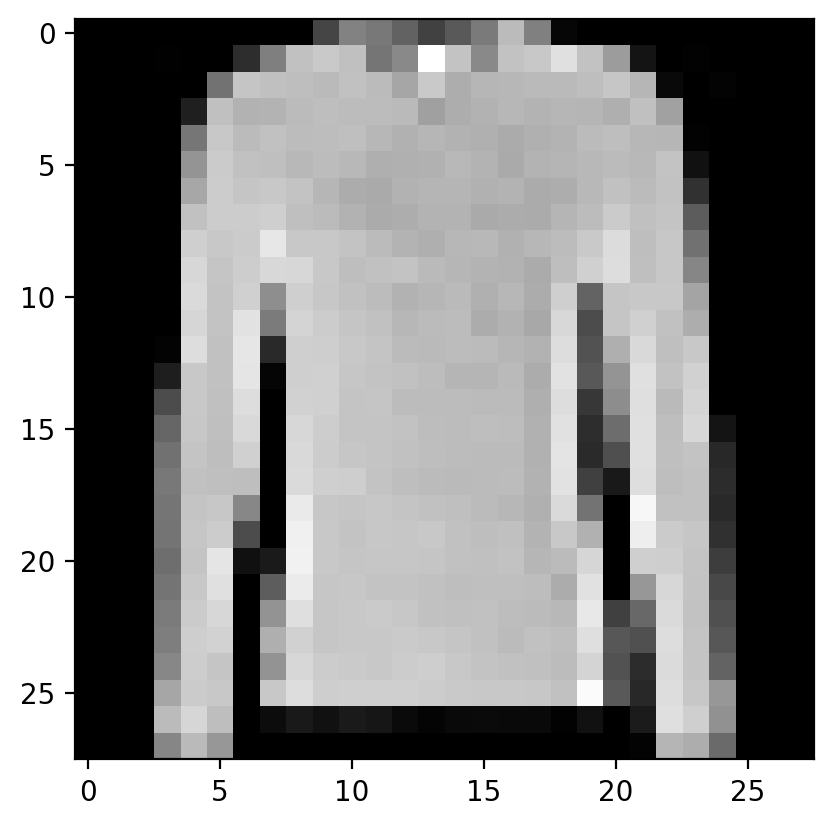

In [70]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [74]:
# Define the network architecture
import torch
from torchvision import transforms

# 정규화에 사용할 평균과 표준편차 (흑백 이미지의 경우)
mean = torch.tensor([0.5])
std = torch.tensor([0.5])

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize(mean, std)  # 이미지 정규화
])

# 테스트 데이터셋을 위한 DataLoader 초기화 및 변환 적용
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 모델 평가 (Evaluation) 시에는 model.eval()을 호출하여 모델을 평가 모드로 설정
model.eval()

# Validation pass
for images, labels in testloader:
    # 이미지 정규화
    images_normalized = (images - mean) / std
    
    # 이미지 데이터를 모델 입력 형태로 변환 (Flatten)
    images_flattened = images_normalized.view(images_normalized.shape[0], -1)
    
    # 모델에 이미지 데이터 전달하여 예측 수행
    log_ps = model(images_flattened)

# 모델 평가 완료 후에는 다시 model.train()을 호출하여 모델을 학습 모드로 변경
model.train()


# 이미지 정규화
images_normalized = (images - mean) / std

from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30.. Training loss: 0.594.. Test loss: 0.471.. Test Accuracy: 0.823
Epoch: 2/30.. Training loss: 0.452.. Test loss: 0.420.. Test Accuracy: 0.851
Epoch: 3/30.. Training loss: 0.418.. Test loss: 0.393.. Test Accuracy: 0.858
Epoch: 4/30.. Training loss: 0.405.. Test loss: 0.380.. Test Accuracy: 0.859
Epoch: 5/30.. Training loss: 0.385.. Test loss: 0.389.. Test Accuracy: 0.864
Epoch: 6/30.. Training loss: 0.374.. Test loss: 0.383.. Test Accuracy: 0.860
Epoch: 7/30.. Training loss: 0.364.. Test loss: 0.369.. Test Accuracy: 0.865
Epoch: 8/30.. Training loss: 0.355.. Test loss: 0.397.. Test Accuracy: 0.861
Epoch: 9/30.. Training loss: 0.353.. Test loss: 0.379.. Test Accuracy: 0.867
Epoch: 10/30.. Training loss: 0.344.. Test loss: 0.365.. Test Accuracy: 0.871
Epoch: 11/30.. Training loss: 0.335.. Test loss: 0.370.. Test Accuracy: 0.871
Epoch: 12/30.. Training loss: 0.334.. Test loss: 0.358.. Test Accuracy: 0.877
Epoch: 13/30.. Training loss: 0.332.. Test loss: 0.364.. Test Accuracy: 0

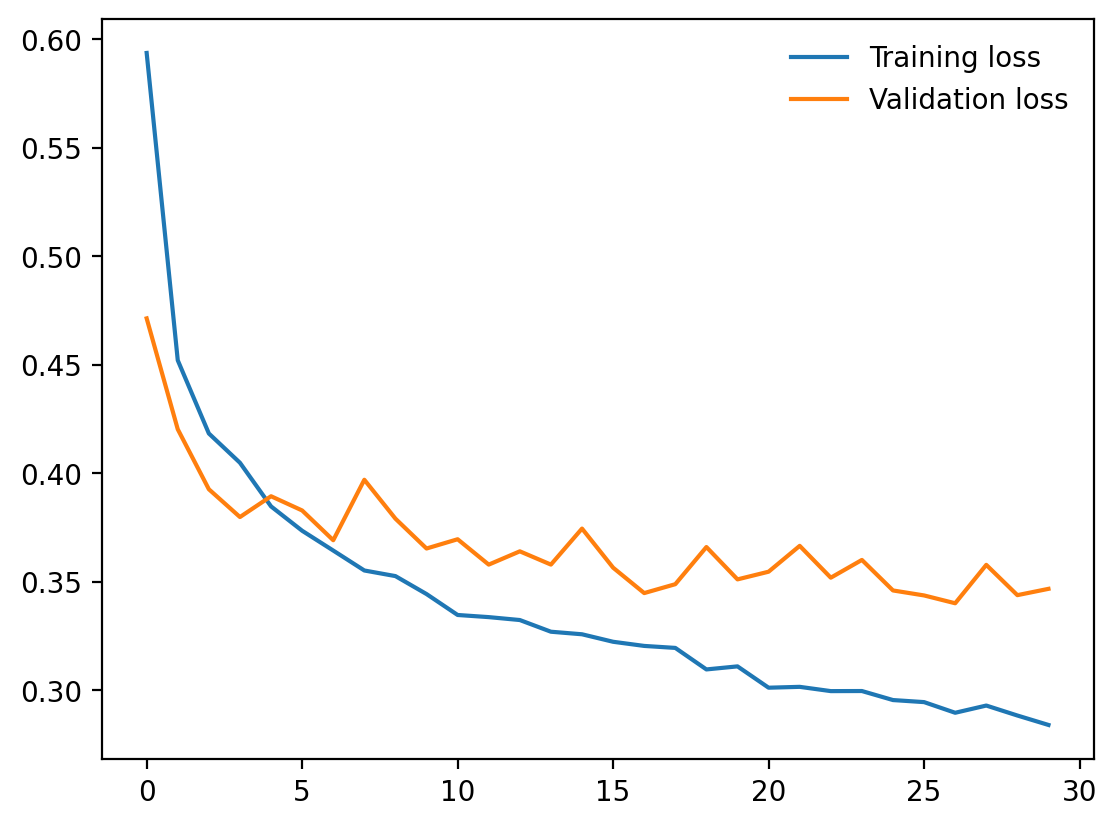

In [75]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

In [76]:
# Define view_classify function
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

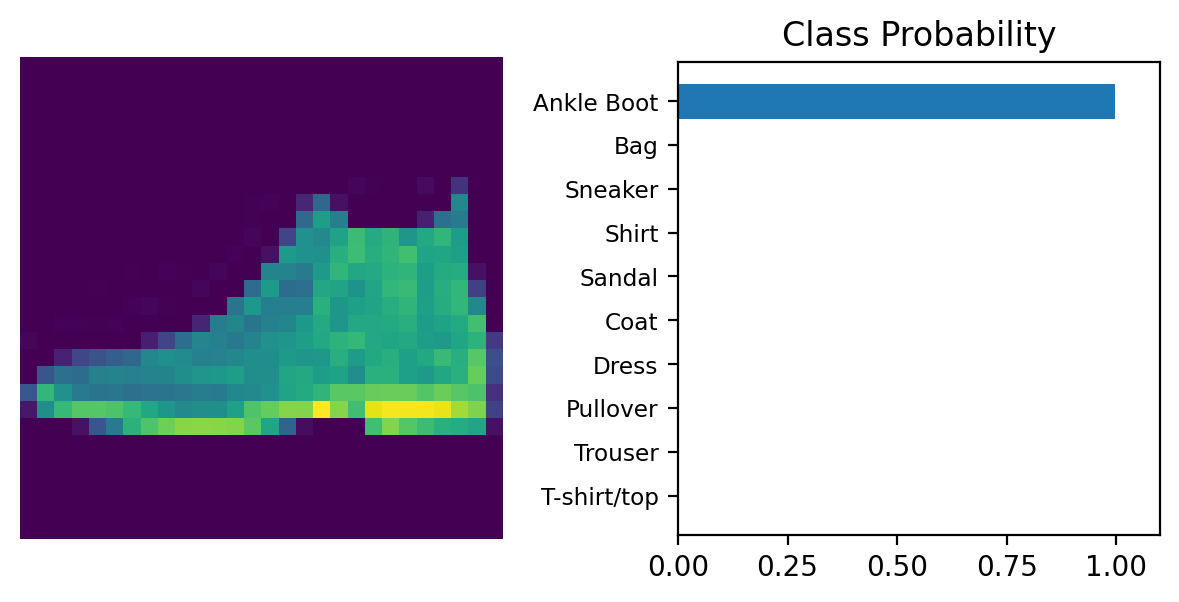

In [88]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Testing out the network
dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

In [89]:
print("My model: \n\n", model, "\n")
print("The state dict keys: \n\n", model.state_dict().keys())

My model: 

 Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [84]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [90]:
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [91]:
# Load the state dict to the network
model.load_state_dict(state_dict)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)
